<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [3]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [4]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

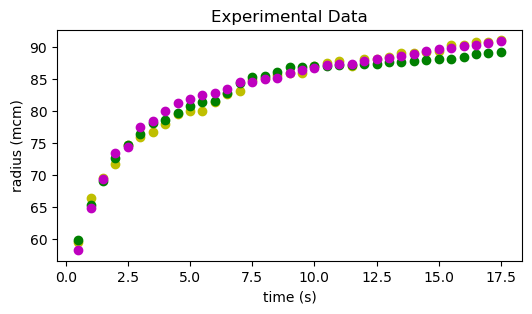

In [5]:
# tweaking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
# plotting data from experiments
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (mcm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In [6]:
# Assume constant volume of droplet
V = 7.6  # Volume in pL

def compute_speed(radius, time):
    return np.gradient(radius, time)

def compute_contact_angle(radius, V):
    H = (np.sqrt(3 * V / np.pi + radius**3) - radius)  # Compute height
    return (np.pi / 2) - np.arctan((radius**2 - H**2) / (2 * H * radius))

# Compute speed for each dataset
speed1 = compute_speed(radius_data1, time)
speed2 = compute_speed(radius_data2, time)
speed3 = compute_speed(radius_data3, time)

# Compute mean speed and its error
speed_mean = (speed1 + speed2 + speed3) / 3
speed_error = np.std([speed1, speed2, speed3], axis=0)

# Compute contact angle for each dataset
angle1 = compute_contact_angle(radius_data1, V)
angle2 = compute_contact_angle(radius_data2, V)
angle3 = compute_contact_angle(radius_data3, V)

# Compute mean contact angle and its error
angle_mean = (angle1 + angle2 + angle3) / 3
angle_error = np.std([angle1, angle2, angle3], axis=0)


In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

Let's plot these results to see what they look like:

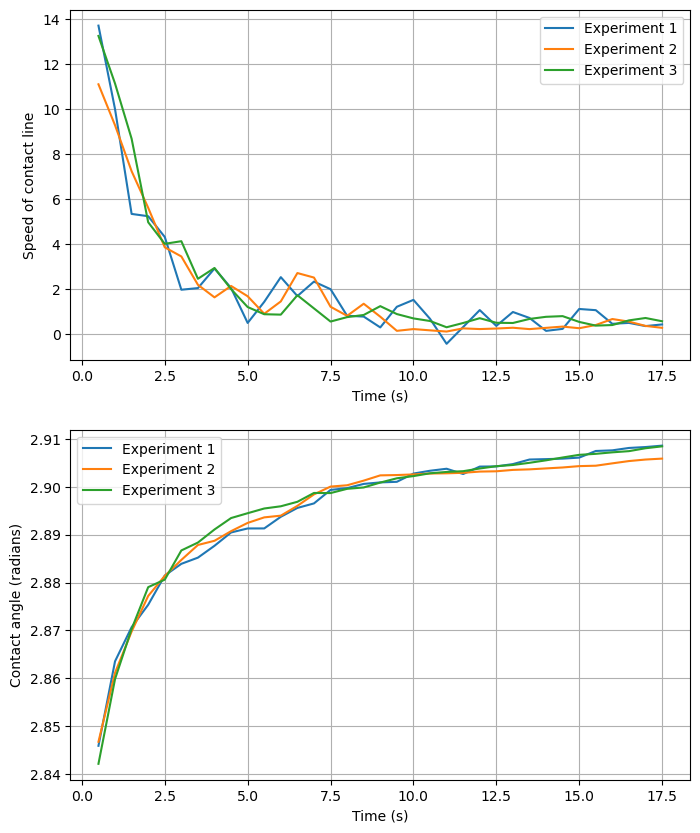

In [7]:
ig, axs = plt.subplots(2, 1, figsize=(8, 10))

for i, (speed, angle, label) in enumerate(zip([speed1, speed2, speed3], [angle1, angle2, angle3], ["Experiment 1", "Experiment 2", "Experiment 3"])):
    axs[0].plot(time, speed, label=label)
    axs[1].plot(time, angle, label=label)

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Speed of contact line')
axs[0].legend()
axs[0].grid()

axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Contact angle (radians)')
axs[1].legend()
axs[1].grid()

plt.show()


The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

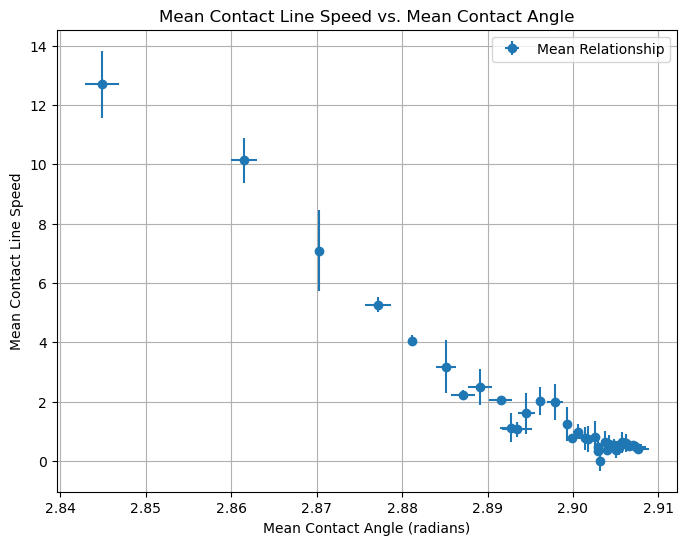

In [8]:
plt.rcParams.update({'font.size': 14})
plt.style.use('default')

# Radius data
radius_data = [
    np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467]),
    np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132]),
    np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
]

time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

# Assume constant volume
V = 7.6  # Volume in pL

def compute_speed(radius, time):
    return np.gradient(radius, time)

def compute_contact_angle(radius, V):
    H = (np.sqrt(3 * V / np.pi + radius**3) - radius)  # Compute height
    return (np.pi / 2) - np.arctan((radius**2 - H**2) / (2 * H * radius))

# Compute speed and contact angle 
speed_data = [compute_speed(r, time) for r in radius_data]
angle_data = [compute_contact_angle(r, V) for r in radius_data]

# Compute mean and standard deviation
mean_speed = np.mean(speed_data, axis=0)
std_speed = np.std(speed_data, axis=0)
mean_angle = np.mean(angle_data, axis=0)
std_angle = np.std(angle_data, axis=0)

# Plot results
plt.figure(figsize=(8,6))
plt.errorbar(mean_angle, mean_speed, xerr=std_angle, yerr=std_speed, fmt='o', label='Mean Relationship')
plt.xlabel('Mean Contact Angle (radians)')
plt.ylabel('Mean Contact Line Speed')
plt.title('Mean Contact Line Speed vs. Mean Contact Angle')
plt.legend()
plt.grid()
plt.show()



![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [9]:
# Compute squared and cubed contact angles
theta_squared = mean_angle**2
theta_cubed = mean_angle**3

# Perform linear regression
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(theta_squared, mean_speed)

# Perform linear regression for Cox-Voinov
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(theta_cubed, mean_speed)

# Extract characteristic speed U0 from slope
U0_fit_2 = slope_2
U0_fit_3 = slope_3

# Error on U0 from standard error of the slope
delta_U0_fit_2 = std_err_2
delta_U0_fit_3 = std_err_3

# Compute fitted theta0 from intercept 
theta0_fit_2 = np.sqrt(abs(intercept_2 / U0_fit_2)) if U0_fit_2 != 0 else np.nan
theta0_fit_3 = np.cbrt(abs(intercept_3 / U0_fit_3)) if U0_fit_3 != 0 else np.nan

# Error propagation for theta0
delta_theta0_fit_2 = (0.5 / np.sqrt(abs(intercept_2 / U0_fit_2))) * abs(delta_U0_fit_2 / U0_fit_2) if U0_fit_2 != 0 else np.nan
delta_theta0_fit_3 = (1 / 3 / np.cbrt(abs(intercept_3 / U0_fit_3))) * abs(delta_U0_fit_3 / U0_fit_3) if U0_fit_3 != 0 else np.nan

# Print results
print(f"de Gennes Law Fit:")
print(f"  U0_fit = {U0_fit_2:.4f} ± {delta_U0_fit_2:.4f}")
print(f"  theta0_fit = {theta0_fit_2:.4f} ± {delta_theta0_fit_2:.4f}")

print(f"\nCox-Voinov Law Fit:")
print(f"  U0_fit = {U0_fit_3:.4f} ± {delta_U0_fit_3:.4f}")
print(f"  theta0_fit = {theta0_fit_3:.4f} ± {delta_theta0_fit_3:.4f}")


de Gennes Law Fit:
  U0_fit = -33.5476 ± 1.4770
  theta0_fit = 2.9057 ± 0.0076

Cox-Voinov Law Fit:
  U0_fit = -7.7549 ± 0.3449
  theta0_fit = 2.9057 ± 0.0051


Displaying the corresponding fits  

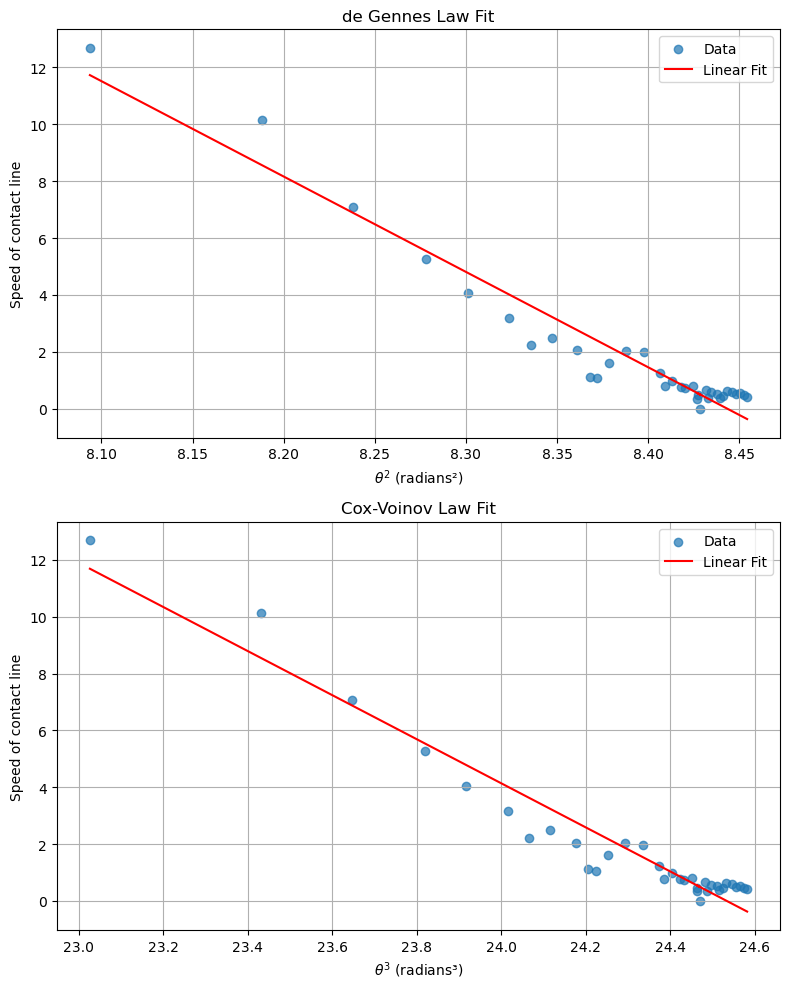

In [10]:
# Plot results
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot U vs θ² for de Gennes fit
axs[0].scatter(theta_squared, mean_speed, label="Data", alpha=0.7)
axs[0].plot(theta_squared, U0_fit_2 * theta_squared + intercept_2, color='r', label="Linear Fit")
axs[0].set_xlabel(r'$\theta^2$ (radians²)')
axs[0].set_ylabel('Speed of contact line')
axs[0].legend()
axs[0].grid()
axs[0].set_title('de Gennes Law Fit')

# Plot
axs[1].scatter(theta_cubed, mean_speed, label="Data", alpha=0.7)
axs[1].plot(theta_cubed, U0_fit_3 * theta_cubed + intercept_3, color='r', label="Linear Fit")
axs[1].set_xlabel(r'$\theta^3$ (radians³)')
axs[1].set_ylabel('Speed of contact line')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Cox-Voinov Law Fit')

plt.tight_layout()
plt.show()

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

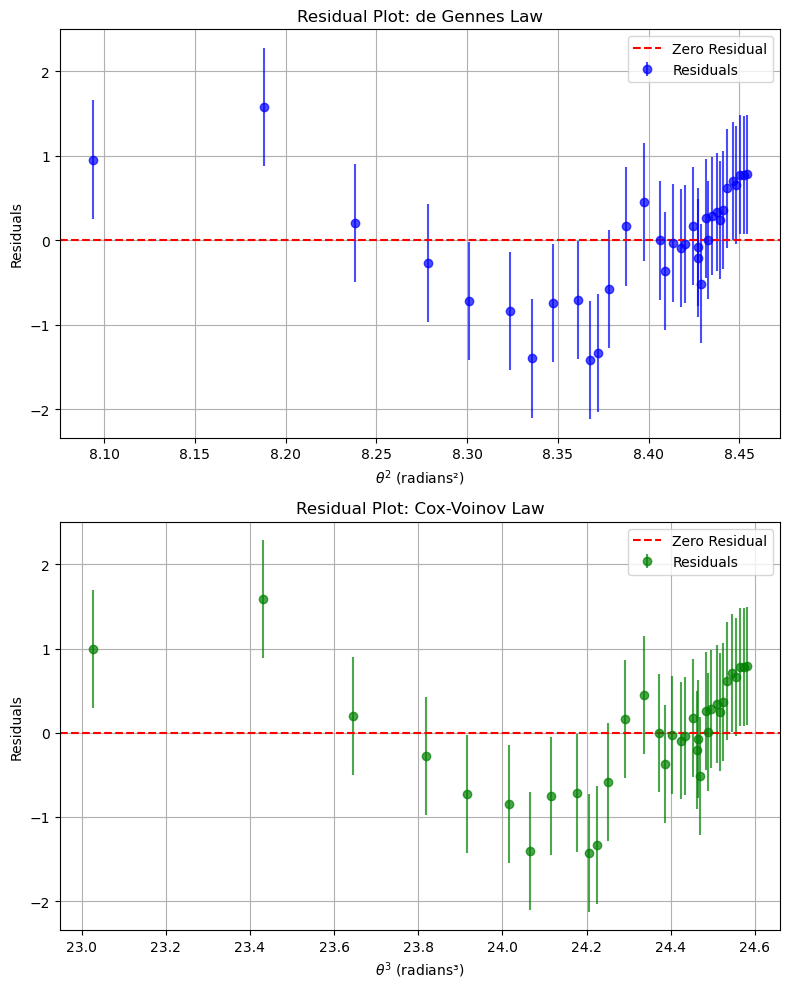

Chi-Squared Test Results:
  de Gennes Law: χ² = 29.9852 ± 64.9134
  Cox-Voinov Law: χ² = 63.9965 ± 247.9027

Gradient (slope) Results:
  de Gennes Law: U0_fit = -33.5476 ± 1.4770
  Cox-Voinov Law: U0_fit = -7.7549 ± 0.3449


In [18]:
theta_squared = mean_angle**2
theta_cubed = mean_angle**3

mean_speed_err = 0.7 * np.ones_like(mean_speed)  # random assinged uncetainty of 0.7

# Perform linear regression for de Gennes law 
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = linregress(theta_squared, mean_speed)

# Perform linear regression for Cox-Voinov law 
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = linregress(theta_cubed, mean_speed)

# Compute predicted speeds
U_pred_2 = slope_2 * theta_squared + intercept_2
U_pred_3 = slope_3 * theta_cubed + intercept_3

# Compute chi-squared statistics
chi2_2 = np.sum(((mean_speed - U_pred_2) ** 2) / U_pred_2)
chi2_3 = np.sum(((mean_speed - U_pred_3) ** 2) / U_pred_3)

# Error on chi-squared from propagation of errors of the fit
chi2_err_2 = np.sqrt(np.sum(((mean_speed_err * theta_squared) ** 2) / U_pred_2))
chi2_err_3 = np.sqrt(np.sum(((mean_speed_err * theta_cubed) ** 2) / U_pred_3))

# Compute residuals
residuals_2 = mean_speed - U_pred_2
residuals_3 = mean_speed - U_pred_3

# Error on residuals
residuals_err_2 = mean_speed_err  # Same uncertainty as the data for residuals
residuals_err_3 = mean_speed_err  # Same uncertainty as the data for residuals

# Plot residuals with error bars
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Residuals for de Gennes fit
axs[0].errorbar(theta_squared, residuals_2, yerr=residuals_err_2, fmt='o', label="Residuals", color='b', alpha=0.7)
axs[0].axhline(0, color='r', linestyle='--', label="Zero Residual")
axs[0].set_xlabel(r'$\theta^2$ (radians²)')
axs[0].set_ylabel('Residuals')
axs[0].legend()
axs[0].grid()
axs[0].set_title('Residual Plot: de Gennes Law')

# Residuals for Cox-Voinov fit
axs[1].errorbar(theta_cubed, residuals_3, yerr=residuals_err_3, fmt='o', label="Residuals", color='g', alpha=0.7)
axs[1].axhline(0, color='r', linestyle='--', label="Zero Residual")
axs[1].set_xlabel(r'$\theta^3$ (radians³)')
axs[1].set_ylabel('Residuals')
axs[1].legend()
axs[1].grid()
axs[1].set_title('Residual Plot: Cox-Voinov Law')

plt.tight_layout()
plt.show()

# Print chi-squared and gradient with errors
print(f"Chi-Squared Test Results:")
print(f"  de Gennes Law: χ² = {chi2_2:.4f} ± {chi2_err_2:.4f}")
print(f"  Cox-Voinov Law: χ² = {chi2_3:.4f} ± {chi2_err_3:.4f}")

print(f"\nGradient (slope) Results:")
print(f"  de Gennes Law: U0_fit = {slope_2:.4f} ± {std_err_2:.4f}")
print(f"  Cox-Voinov Law: U0_fit = {slope_3:.4f} ± {std_err_3:.4f}")

![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because ...  

In [16]:
if chi2_2 < chi2_3:
    print("\n The de Gennes Law provides a better fit based on the chi-squared test.")
else:
    print("\n The Cox-Voinov Law provides a better fit based on the chi-squared test.")



 The de Gennes Law provides a better fit based on the chi-squared test.


![](./img/bee.png)
## Stretch yourself section

This section is to be populated by you entirely 